# Import Libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Data 

In [4]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.shape

(7728394, 46)

In [7]:
numeric = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

13

# Percentage of Missing Values

In [8]:
Missing_Values = df.isnull().sum().sort_values(ascending=False)/len(df)
Missing_Values

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [9]:
type(Missing_Values)

pandas.core.series.Series

Text(0.5, 0, 'Cloumns')

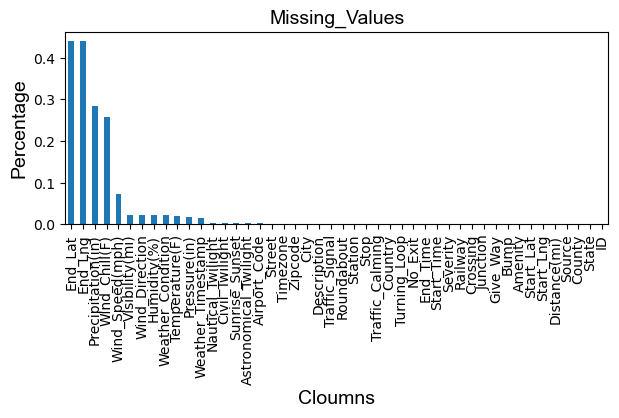

In [10]:
plt.figure(figsize=(7,2.5))
Missing_Values.plot(kind='bar')
plt.title('Missing_Values',fontdict={'size':14,'font':'Arial'})
plt.ylabel('Percentage',fontdict={'size':14,'font':'Arial'})
plt.xlabel('Cloumns',fontdict={'size':14,'font':'Arial'})

In [11]:
Missing_Values[Missing_Values != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

Text(0.5, 0, 'Cloumns')

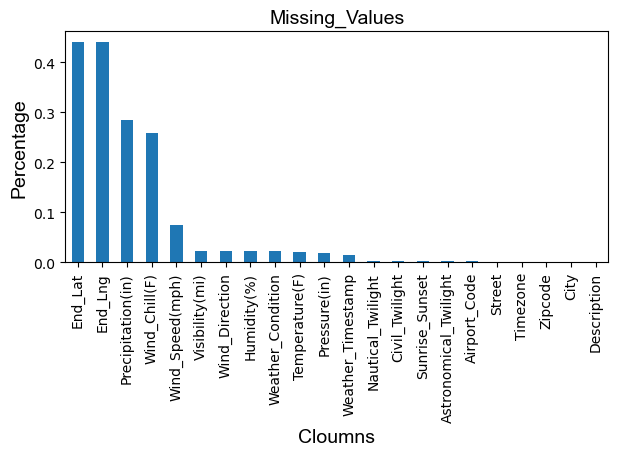

In [12]:
plt.figure(figsize=(7,3))
Missing_Values[Missing_Values != 0].plot(kind='bar')
plt.title('Missing_Values',fontdict={'size':14,'font':'Arial'})
plt.ylabel('Percentage',fontdict={'size':14,'font':'Arial'})
plt.xlabel('Cloumns',fontdict={'size':14,'font':'Arial'})

In [13]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Exploratory Analysis Visualization

In [14]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [15]:
cities=df.City.unique()
print(cities)
len(cities)

['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Ness City' 'Clarksdale'
 'American Fork-Pleasant Grove']


13679

In [16]:
cities_by_Accident = df.City.value_counts()
cities_by_Accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [17]:
cities_by_Accident[:10]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

Text(0.5, 0, 'city_name')

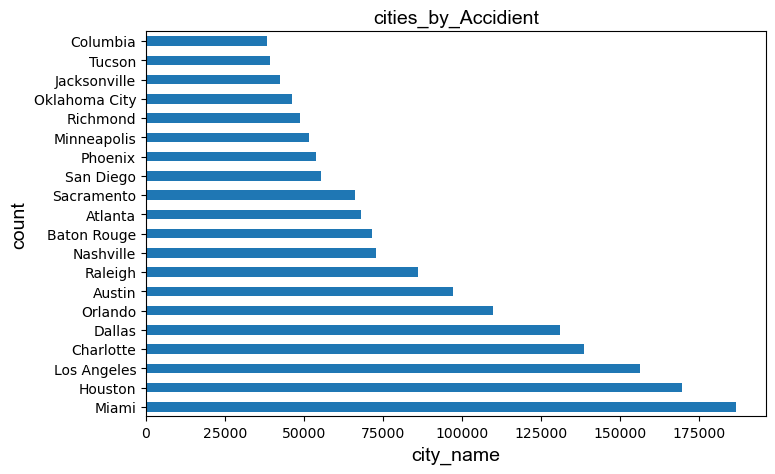

In [18]:
plt.figure(figsize=(8,5))
cities_by_Accident[:20].plot(kind='barh')
plt.title('cities_by_Accidient',fontdict={'size':14,'font':'Arial'})
plt.ylabel('count',fontdict={'size':14,'font':'Arial'})
plt.xlabel('city_name',fontdict={'size':14,'font':'Arial'})

<Axes: xlabel='count', ylabel='Count'>

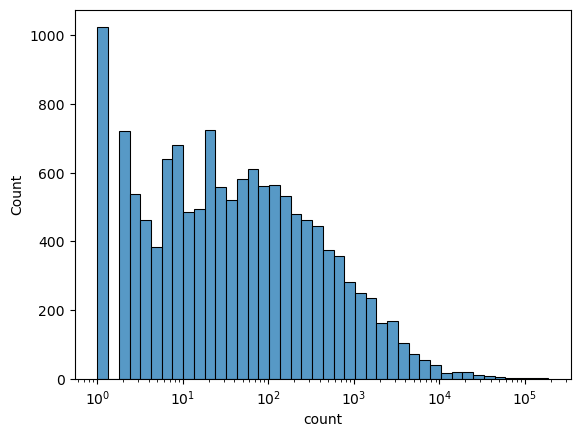

In [19]:
sns.histplot(cities_by_Accident,log_scale=True)

In [20]:
high_accident_cities = cities_by_Accident[cities_by_Accident >=1000]
low_accident_cities = cities_by_Accident[cities_by_Accident <=1000]

In [21]:
len(high_accident_cities)/len(cities)

0.08904159660793917

In [22]:
len(low_accident_cities)/len(cities)

0.9111046129103004

In [23]:
'NY' in df.State

False

<Axes: xlabel='count', ylabel='Density'>

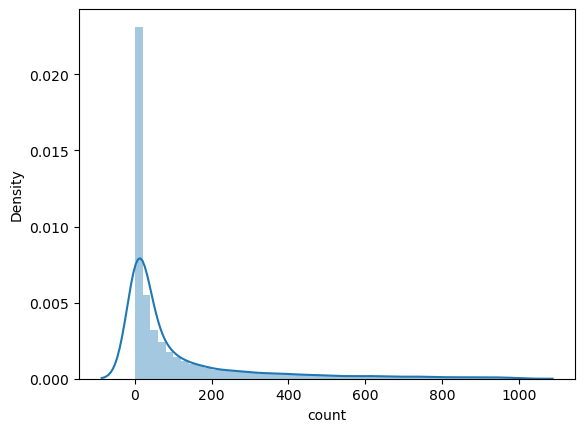

In [24]:
sns.distplot(low_accident_cities)

In [25]:
cities_by_Accident[cities_by_Accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [25]:
# Time

In [28]:
#sns.histplot(df.Start_Time)

In [46]:
df['Start_Time']=='mixed'

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Name: Start_Time, Length: 7728394, dtype: bool

In [72]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')
df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [73]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [74]:
df.Start_Time.dt.hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Time', ylabel='Count'>

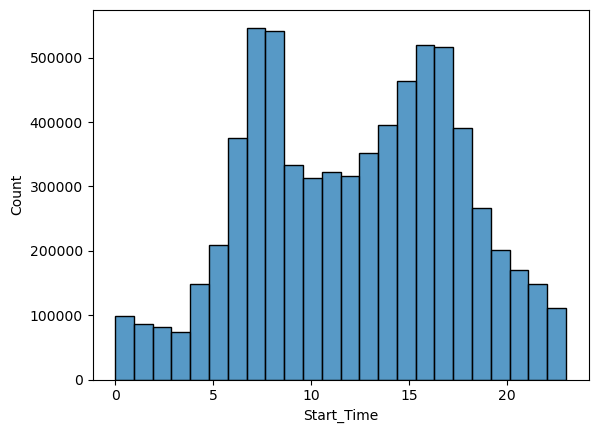

In [78]:
sns.histplot(df.Start_Time.dt.hour,bins=24,kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

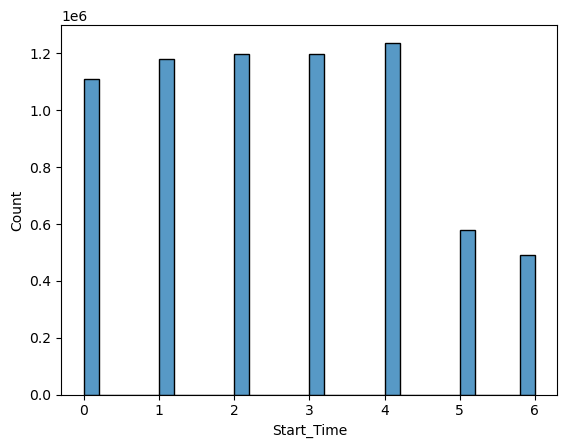

In [80]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=30,kde=False)

<Axes: xlabel='Start_Time'>

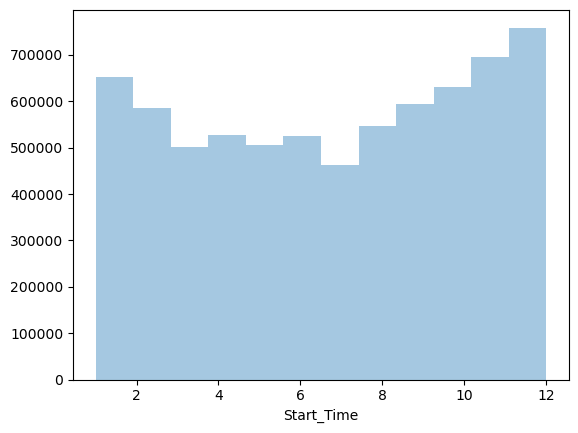

In [81]:
sns.distplot(df.Start_Time.dt.month,bins=12 ,kde=False)

<Axes: ylabel='count'>

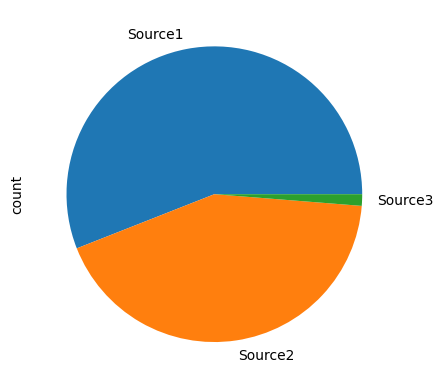

In [82]:
df.Source.value_counts().plot(kind='pie')

# Start Latitude & longitude

In [83]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [84]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lat', ylabel='Start_Lng'>

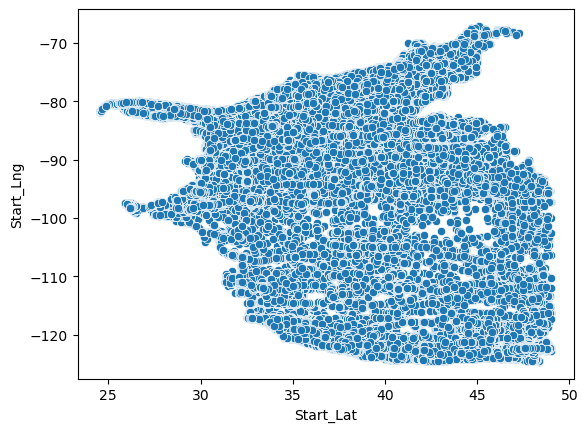

In [85]:
sns.scatterplot(x='Start_Lat' , y = 'Start_Lng' ,data=df)

In [89]:
smaple_df = df.sample(int(0.1*len(df)))
smaple_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3536,A-3537,Source2,3,2016-07-20 01:12:40,2016-07-20 02:12:40,38.044914,-122.238358,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
6796037,A-6845175,Source1,2,2020-11-15 01:39:59,2020-11-15 03:39:59,43.336397,-122.714635,43.305987,-122.677125,2.823,...,False,False,False,False,False,False,Night,Night,Night,Night
4805613,A-4842078,Source1,2,2022-02-21 03:39:00,2022-02-21 05:43:15,39.585747,-76.090847,39.576637,-76.124167,1.883,...,False,False,False,False,False,False,Night,Night,Night,Night
5873469,A-5917384,Source1,2,2021-07-31 14:34:43,2021-07-31 15:57:53,33.974646,-118.285440,33.974657,-118.282673,0.159,...,False,False,False,False,False,False,Day,Day,Day,Day
893870,A-903586,Source2,3,2021-09-13 02:20:31,2021-09-13 02:49:49,34.029102,-118.226028,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493721,A-3503604,Source1,3,2016-07-07 17:21:05,2016-07-07 23:21:05,42.277160,-88.040770,42.277160,-88.040770,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4411511,A-4444904,Source1,2,2022-11-20 16:03:00,2022-11-20 17:26:39,27.543478,-80.468731,27.529649,-80.457347,1.183,...,False,False,False,False,False,False,Day,Day,Day,Day
2183342,A-2193208,Source2,3,2019-04-29 12:28:19,2019-04-29 13:42:55,42.733212,-73.698502,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4444307,A-4477983,Source1,2,2022-02-18 15:41:02,2022-02-18 16:57:29,39.278151,-76.553303,39.243151,-76.578693,2.774,...,False,False,False,False,False,False,Day,Day,Day,Day


<Axes: xlabel='Start_Lat', ylabel='Start_Lng'>

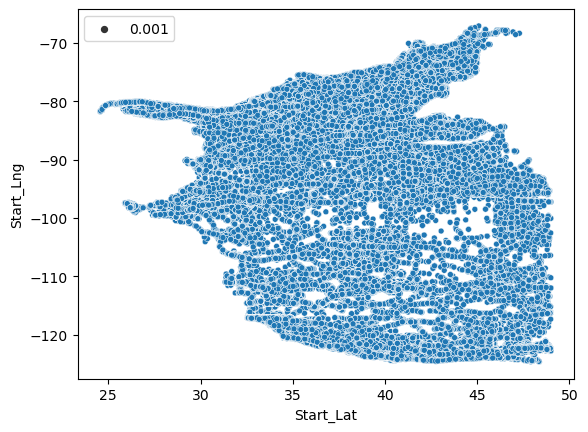

In [88]:
sns.scatterplot(x='Start_Lat' , y = 'Start_Lng' ,data=df,size =0.001)

In [ ]:
import folium

In [93]:
lat,lon = df.Start_Lat[0],df.Start_Lng[0]
lat,lon

(39.865147, -84.058723)